In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         10 non-null     float64
 1   Radio      10 non-null     float64
 2   Newspaper  10 non-null     float64
 3   Sales      10 non-null     float64
dtypes: float64(4)
memory usage: 452.0 bytes
None
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
              TV      Radio  Newspaper      Sales
count   10.00000  10.000000  10.000000  10.000000
mean   101.89000  28.110000  43.280000  12.080000
std     84.89945  17.836071  26.850649   5.090034
min      8.60000   2.100000   1.000000   4.800000
25%     24.02500  13.000000  21.775000   9.575000
50%     88.85000  35.300000  51.750000  11.200000
75%    173.47500  40.800000  66.525000  13.125000
max    230.10000  48.900000  75.000000  22.100000


In [4]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [7]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

In [8]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

mae_lin, mse_lin, rmse_lin = evaluate_model(y_test, y_pred_lin)
mae_poly, mse_poly, rmse_poly = evaluate_model(y_test, y_pred_poly)
mae_svr, mse_svr, rmse_svr = evaluate_model(y_test, y_pred_svr)

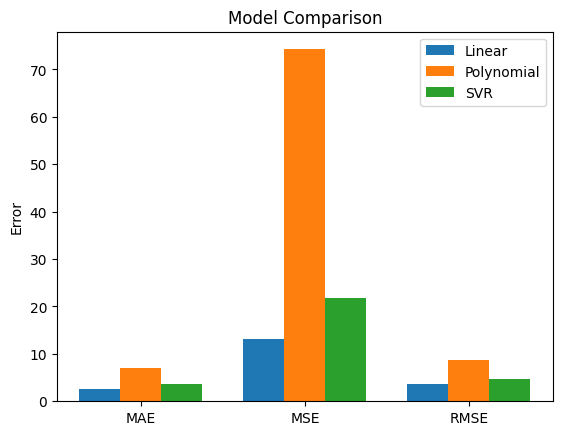

In [9]:
metrics = ['MAE', 'MSE', 'RMSE']
lin_scores = [mae_lin, mse_lin, rmse_lin]
poly_scores = [mae_poly, mse_poly, rmse_poly]
svr_scores = [mae_svr, mse_svr, rmse_svr]

x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, lin_scores, width, label='Linear')
plt.bar(x, poly_scores, width, label='Polynomial')
plt.bar(x + width, svr_scores, width, label='SVR')
plt.xticks(x, metrics)
plt.ylabel('Error')
plt.title('Model Comparison')
plt.legend()
plt.show()


In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

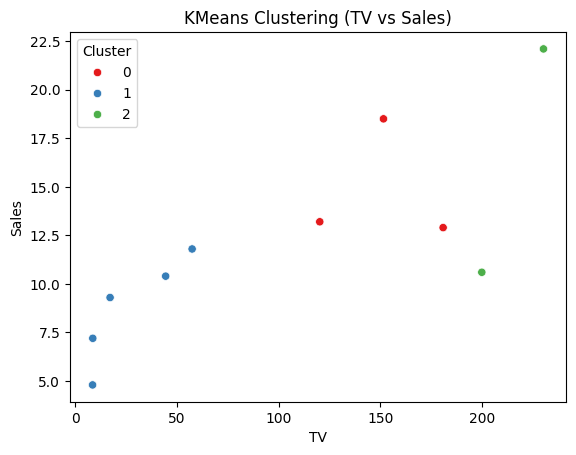

In [11]:
sns.scatterplot(data=df, x='TV', y='Sales', hue='Cluster', palette='Set1')
plt.title('KMeans Clustering (TV vs Sales)')
plt.show()